In [211]:
import pandas as pd
import time
import itertools
import matplotlib.pyplot as plt

import os
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
from selenium import webdriver
from bs4 import BeautifulSoup

In [212]:
i30_reply_data = pd.read_csv('../W2/i30_review_data.csv')
i30_reply_data.columns

Index(['cid', 'text', 'author', 'channel', 'votes', 'reply', 'time_parsed',
       'sentiment'],
      dtype='object')

<Axes: >

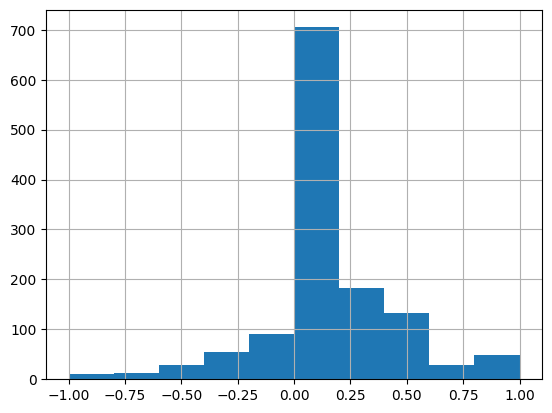

In [213]:
i30_reply_data['sentiment'].hist()

In [214]:
def processing(x):    
    words = x.split(' ')
    for idx, word in enumerate(words):
        word = word.replace('\n', '')
        word = word.replace(',', '')
        word = word.replace('.', '')
        words[idx] = word
    return words

In [215]:
positive_words_series = i30_reply_data.text.loc[i30_reply_data.sentiment > 0.3].apply(processing)
positive_words_2d = positive_words_series.to_list()
positive_words = list(itertools.chain(*positive_words_2d))

In [216]:
negative_words_series = i30_reply_data.text.loc[i30_reply_data.sentiment < -0.3].apply(processing)
negative_words_2d = negative_words_series.to_list()
negative_words = list(itertools.chain(*negative_words_2d))

In [217]:
positive_counts = Counter(positive_words)
# positive_tags = positive_counts.most_common(200) 
positive_dict = dict(positive_counts)

negative_counts = Counter(negative_words)
# negative_tags = negative_counts.most_common(200) 
negative_dict = dict(negative_counts)

In [218]:
intersect_words = list(set(positive_dict.keys())&set(negative_dict.keys()))
positive_counts

Counter({'the': 259,
         'a': 149,
         'is': 102,
         'I': 93,
         'and': 93,
         'in': 86,
         'it': 86,
         'for': 67,
         'car': 65,
         'to': 63,
         'but': 53,
         'of': 51,
         'that': 48,
         'this': 45,
         'you': 42,
         'N': 41,
         '': 41,
         'better': 35,
         'my': 35,
         'more': 35,
         'good': 33,
         'on': 33,
         'with': 32,
         'than': 31,
         'Hyundai': 31,
         'one': 30,
         'have': 29,
         'best': 29,
         'so': 28,
         'are': 27,
         'not': 24,
         'R': 23,
         'love': 23,
         'cars': 23,
         'be': 22,
         'The': 20,
         'just': 20,
         'great': 19,
         'would': 18,
         'still': 18,
         'was': 18,
         'like': 17,
         'at': 17,
         'hot': 17,
         'or': 16,
         "it's": 16,
         'review': 16,
         'can': 16,
         'looks': 15,
        

In [219]:
print(intersect_words)
for word in intersect_words:
    try:
        positive_dict.pop(word)
        negative_dict.pop(word)       
    except:
        pass

['', 'drive', 'times', 'Elantra', 'track', 'no', 'You', 'little', 'myself', 'deal', 'test', 'A', '625', 'car', 'is', 'N', 'UK', 'states', '6', 'it’s', 'Hyundai', 'makes', 'seconds', 'good', "It's", 'hyundai', 'really', 'does', 'stock', 'out', 'he', '\xa0@andypaul999\xa0', 'i30n', 'I30', 'absolutely', 'go', 'mat', 'up', 'korean', 'design', '\xa0@peranavansithy5935\xa0', 'economy', 'hell', 'how', 'fuel', 'including', 'don’t', 'after', 'i30', 'for', 'hatchback', 'from', 'option', 'at', 'Honda', 'tuned', 'would', 'we', 'manufacturer', 'these', '\xa0@drone_tours\xa0', 'But', 'purchase', 'sins', 'It’s', 'be', 'fastback', 'Amazing', 'because', 'this', 'can', 'Yes', 'lol', 'quality', 'Koreans', 'badge', 'around', 'said', 'cheaper', 'The', 'put', 'has', 'surface', 'and', 'didnt', 'have', 'Type', 'of', '😂', 'manual', 'on', 'their', 'gear', 'the', 'got', 'front', "That's", 'if', 'think', 'Too', 'circles', 'could', 'difference', 'check', 'piston', 'FWD', 'mate', "Don't", 'a', 'with', 'type', 'too'

In [220]:
positive_wc = WordCloud(background_color="white", max_font_size=60)
positive_cloud = positive_wc.generate_from_frequencies(positive_dict)
negative_wc = WordCloud(background_color="white", max_font_size=60)
negative_cloud = negative_wc.generate_from_frequencies(negative_dict)

Text(0.5, 1.0, 'Negative YouTube Word Cloud')

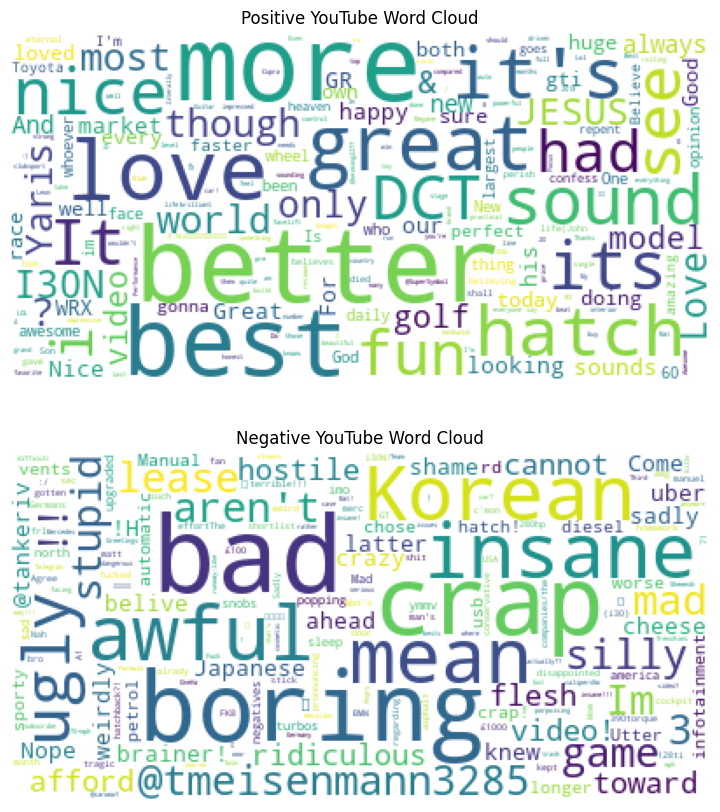

In [222]:
plt.figure(figsize=(10,10))

plt.subplot(211)
plt.xticks([], [])
plt.yticks([], [])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.imshow(positive_cloud)
plt.title('Positive YouTube Word Cloud')

plt.subplot(212)
plt.xticks([], [])
plt.yticks([], [])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.imshow(negative_cloud)
plt.title('Negative YouTube Word Cloud')
